In [1]:
import numpy as np
import pandas as pd

In [2]:
# Read the data from sample_data folder in drive
data = pd.read_csv("/content/sample_data/Breastcancermodified.csv")

In [3]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Check for missing vals
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
# Preprocessing data set
# Drop unnecessary cols
colsDrop = ['id']
data = data.drop(colsDrop, axis=1)
# Encode diagnosis
data['diagnosis'] = data['diagnosis'].map({'M':1, 'B':0})
# Featureset creation
X = data.drop('diagnosis', axis=1).values
X = StandardScaler().fit_transform(X)

Text(0.5, 1.0, 'Kmeans clustering plot')

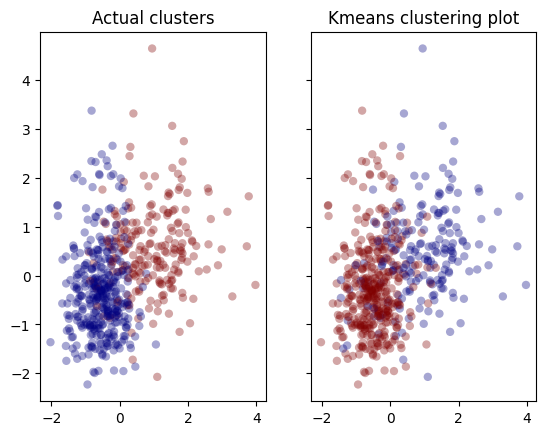

In [6]:
# Apparently the correct code with be uploaded later on
# Import kmeans from sklearn
from sklearn.cluster import KMeans
# Fit k_means model and predict values
km_pred = KMeans(n_clusters=2, init = "k-means++", n_init = 10).fit_predict(X)


# kmeans scatter plots
# This is not the most efficient way of doing it
f, (ax1, ax2) = plt.subplots(1,2,sharey = True)

# Use the encoded diagnosis (numeric) for the color
ax1.scatter(X[:,0], X[:,1], c=data["diagnosis"], cmap = "jet", edgecolor = "None", alpha = 0.35)
ax1.set_title("Actual clusters")

ax2.scatter(X[:,0], X[:,1], c=km_pred, cmap = "jet", edgecolor = "None", alpha = 0.35)
ax2.set_title("Kmeans clustering plot")

Text(0.5, 1.0, 'Agglomerative clustering plot')

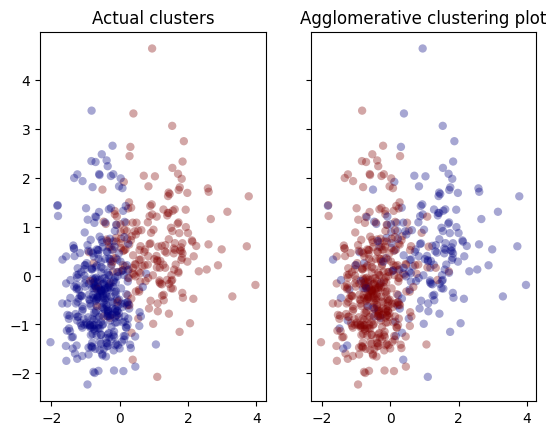

In [7]:
# Hierarchical agglomerative clustering
from sklearn.cluster import AgglomerativeClustering
ac_pred = AgglomerativeClustering(n_clusters=2, linkage = "ward").fit_predict(X)

# Scatter plots
f, (ax1, ax2) = plt.subplots(1, 2, sharey = True)

ax1.scatter(X[:,0], X[:,1], c=data["diagnosis"], cmap = "jet", edgecolor = "None", alpha = 0.35)
ax1.set_title("Actual clusters")

ax2.scatter(X[:,0], X[:,1], c=ac_pred, cmap = "jet", edgecolor = "None", alpha = 0.35)
ax2.set_title("Agglomerative clustering plot")

Text(0.5, 1.0, 'DBSCAN clustering plot')

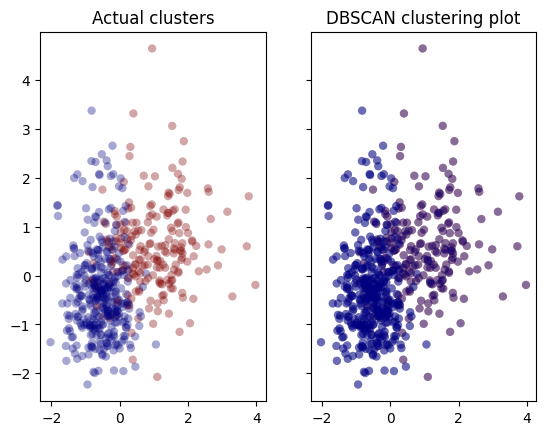

In [8]:
# DBSCAN
from sklearn.cluster import DBSCAN
# The eps (spsilon) param specifies the max distance between two points
# from them to be considered as neigbors. In other wrods,
# it defines the raidus of the enighborhhod around the point.
# If the distance between two points is less than or equal to eps, they are
# considered neighbors.. This param plays a crucial role in deteriming the density
# of the clsuters. The min_samples param specifies the min number of points
# required to form a dense region (a cluster)
dbs = DBSCAN(eps = 0.2, min_samples = 6).fit_predict(X)
f, (ax1, ax2) = plt.subplots(1,2,sharey = True)

ax1.scatter(X[:,0], X[:,1], c=data["diagnosis"], cmap = "jet", edgecolor = "None", alpha = 0.35)
ax1.set_title("Actual clusters")

ax2.scatter(X[:,0], X[:,1], c=data["diagnosis"], cmap = "jet", edgecolor = "None", alpha = 0.35)
ax2.set_title("DBSCAN clustering plot")

ax2.scatter(X[:,0], X[:,1], c=dbs, cmap = "jet", edgecolor = "None", alpha = 0.35)
ax2.set_title("DBSCAN clustering plot")

# text(0.5, 1.0, 'DBSCAN Clustering  plot')

Text(0.5, 1.0, 'MeanShift clustering plot')

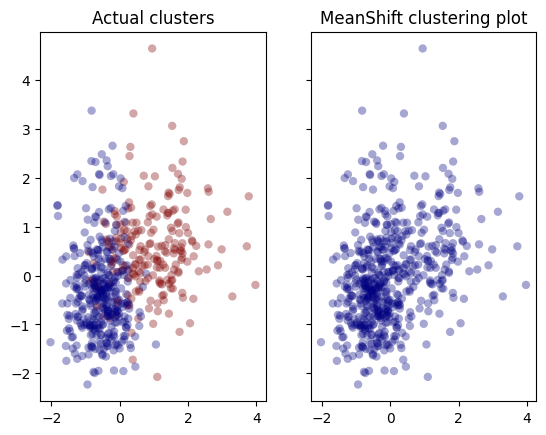

In [9]:
# Meanshift clustering
from sklearn.cluster import MeanShift, estimate_bandwidth
# Sample selection: if the dataset contains more than n_samples points,
# a random subset of n_samples points is elected. If it contains fewer, all points are used
bandwidth = estimate_bandwidth(X, quantile = 0.2, n_samples = 500)
# Quantile - over here, we have 500 samples. So we are taking the quantiles (.2)
# of the sample data and calculating each sample data and calc the means.
# bin_seeding is an optimizing package of sklearn. Here it is used for choosing
# the optimal values of the cluster means.
# bin_seeding = True parameter is used to optimize the intialization of cluster
# centers.
ms = MeanShift(bandwidth = bandwidth, bin_seeding = True).fit_predict(X)

# Scatter plots
f, (ax1, ax2) = plt.subplots(1,2,sharey = True)

ax1.scatter(X[:,0], X[:,1], c=data["diagnosis"], cmap = "jet", edgecolor = "None", alpha = 0.35)
ax1.set_title("Actual clusters")
# change the color
ax2.scatter(X[:,0], X[:,1], c=ms, cmap = "jet", edgecolor = "None", alpha = 0.35)
ax2.set_title("MeanShift clustering plot")

Text(0.5, 1.0, 'Spectral clustering plot')

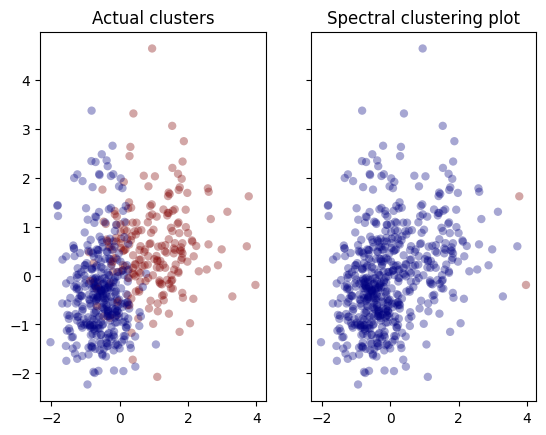

In [10]:
# Spectral clustering
from sklearn.cluster import spectral_clustering
from sklearn.cluster import SpectralClustering
# This param is a kernel coefficient for the 'rbf' (radial basis function) kernel.
# It defines how much influence a single training example has.
# A lower value of gamma indicates a 'far' influence, meaning the raidus of influence
# of each example is larger. Conversely, a higher value implies a closer, more
# localized influence.
sc = SpectralClustering(n_clusters = 2, gamma = 0.5, affinity = "rbf", assign_labels = "discretize")
sc_pred = sc.fit_predict(X)
# Scatter plots
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(X[:,0], X[:,1], c=data["diagnosis"], cmap = "jet", edgecolor = "None", alpha = 0.35)
ax1.set_title("Actual clusters")

ax2.scatter(X[:,0], X[:,1], c=sc_pred, cmap = "jet", edgecolor = "None", alpha = 0.35)
ax2.set_title("Spectral clustering plot")

Text(0.5, 1.0, 'Gaussian mixture model plot')

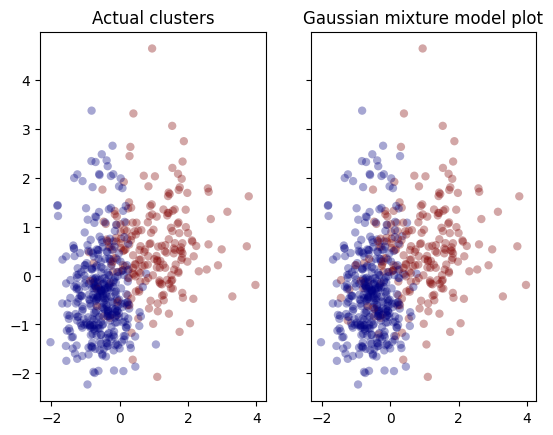

In [11]:
# Gaussian mixture model with expectation maximization (EM) clustering
# uses all specified components to fit
# Expectation maximization indicates that the probability that the data point
# will belong to a particular cluster is maximized
from sklearn.mixture import GaussianMixture
# The Gaussian Mixture model with n_components=2 and covariance_type = "full"
# fits a mixture of two Gaussian distributions to the data,
# allowing each distribution to have its own full covariance matrix
gm = GaussianMixture(n_components = 2, covariance_type = "full").fit_predict(X)
# scatter plots
f, (ax1, ax2) = plt.subplots(1,2,sharey = True)

ax1.scatter(X[:,0], X[:,1], c=data["diagnosis"], cmap = "jet", edgecolor = "None", alpha = 0.35)
ax1.set_title("Actual clusters")

ax2.scatter(X[:,0], X[:,1], c=gm, cmap = "jet", edgecolor = "None", alpha = 0.35)
ax2.set_title("Gaussian mixture model plot")

Text(0.5, 1.0, 'Gaussian mixture model plot')

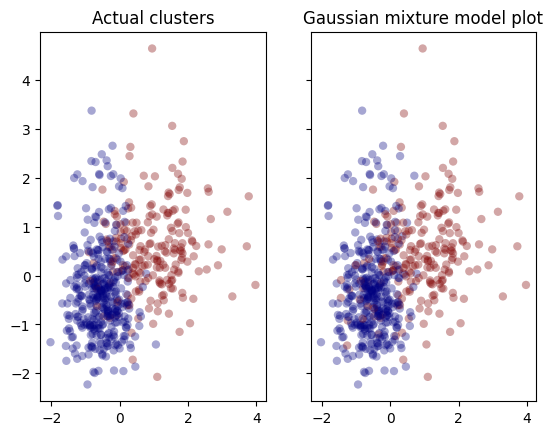

In [12]:
# Guassian mixture with variation inference (VI) clustering >> dirichlet process
# uses only as much as needed components for a good fit
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components = 2, covariance_type = "full").fit_predict(X)

# scatter plots
f, (ax1, ax2) = plt.subplots(1,2,sharey = True)
ax1.scatter(X[:,0], X[:,1], c=data["diagnosis"], cmap = "jet", edgecolor = "None", alpha = 0.35)
ax1.set_title("Actual clusters")

ax2.scatter(X[:,0], X[:,1], c=bgm, cmap = "jet", edgecolor = "None", alpha = 0.35)
ax2.set_title("Gaussian mixture model plot")